# clean

Example data-cleaning tasks:

- read and save CSV files
- normalize column names
- standardize numerical features
- do [principal component analysis]

[principal component analysis]: https://en.wikipedia.org/wiki/Principal_component_analysis

In [1]:
import pandas
import seaborn
import sklearn.decomposition

import tools

## inspect the scikit-learn [iris flower dataset]

[iris flower dataset]: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
iris = tools.irisdata()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [3]:
# show a few random rows
tools.afew(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
80,5.5,2.4,3.8,1.1,versicolor
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
39,5.1,3.4,1.5,0.2,setosa
75,6.6,3.0,4.4,1.4,versicolor


In [4]:
# separate target column (what want to predict) from features
target = iris['species']
feats = iris[iris.columns.drop('species')]
tools.afew(feats)

,sepal_length,sepal_width,petal_length,petal_width
63,6.1,2.9,4.7,1.4
129,7.2,3.0,5.8,1.6
82,5.8,2.7,3.9,1.2
146,6.3,2.5,5.0,1.9
28,5.2,3.4,1.4,0.2


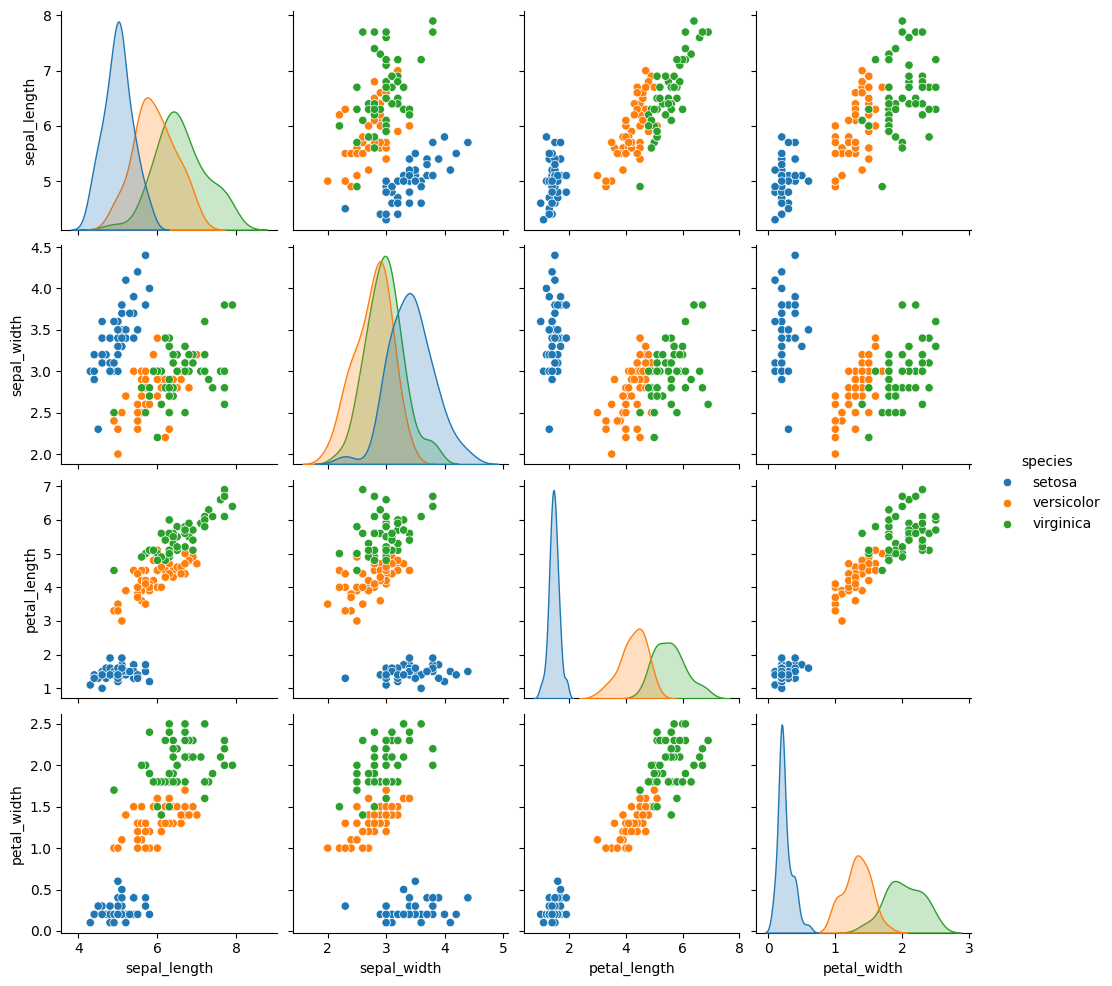

In [5]:
# plot histograms and scatterplots for each species
seaborn.pairplot(iris, hue='species')

## standardize features

In [6]:
sfeats = tools.zscores(feats)

print("mean:")
print(sfeats.mean())
print()
print("variance:")
print(sfeats.var())
tools.afew(sfeats)

mean:
sepal_length   -4.736952e-16
sepal_width    -7.815970e-16
petal_length   -2.368476e-16
petal_width    -3.315866e-16
dtype: float64

variance:
sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64


,sepal_length,sepal_width,petal_length,petal_width
58,0.913776,-0.360967,0.476973,0.132067
90,-0.414621,-1.049251,0.363678,0.000875
54,0.793012,-0.590395,0.476973,0.394453
85,0.189196,0.786174,0.420326,0.525645
146,0.551486,-1.278680,0.703564,0.919223


## standardize features (robust mode)

In [7]:
rfeats = tools.zscores(feats, robust=True)

print("median:")
print(rfeats.median())
print()
print("mean absolute deviation:")
print(rfeats.abs().mean())
tools.afew(rfeats)

median:
sepal_length    0.000000e+00
sepal_width     0.000000e+00
petal_length    2.983724e-16
petal_width     0.000000e+00
dtype: float64

mean absolute deviation:
sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64


,sepal_length,sepal_width,petal_length,petal_width
106,-1.314508,-1.512097,0.100761,0.620476
14,0.000000,3.024194,-2.115987,-1.706308
35,-1.168452,0.604839,-2.115987,-1.706308
111,0.876339,-0.907258,0.638155,0.930714
41,-1.898734,-2.116935,-2.048813,-1.551189


## find 2 principal components

In [8]:
pcdata = tools.princols(iris, 2)
tools.afew(pcdata)

,pc0,pc1,species
0,-2.818240,5.646350,setosa
145,-7.446475,5.514485,virginica
15,-3.116326,6.665015,setosa
115,-7.406822,5.446203,virginica
42,-2.504959,4.985027,setosa


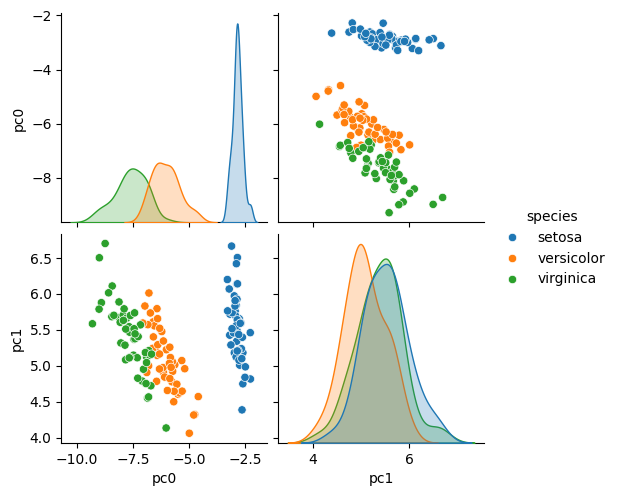

In [9]:
seaborn.pairplot(pcdata, hue='species')

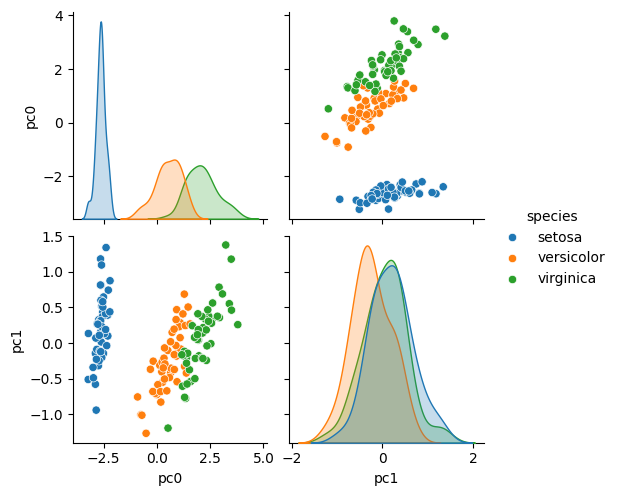

In [10]:
# scikit-learn can also find principal components
skdata = sklearn.decomposition.PCA(2).fit_transform(feats)
skdata = pandas.DataFrame(skdata, columns=['pc0','pc1'])

seaborn.pairplot(skdata.join(target), hue=target.name)